## Tratamientos de Datos

In [24]:
# Importando librerías 
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim
from statistics import mode
import statsmodels.api as sm


## Lectura de DataFrame 

In [3]:
data = pd.read_csv(r'propiedades.csv', sep = ',', index_col = 0)
print(f'El dataframe de properati está compuesto por {data.shape[1]} columnas y {data.shape[0]} filas') 
data.sample(3)

El dataframe de properati está compuesto por 15 columnas y 107980 filas


,property_type,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,apartment,house,store,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_Mayor a 5,amb_No Informado
64847,store,Bs.As. G.B.A. Zona Norte,NaN,6500.000000,6500.0,NaN,0,0,1,0,0,0,0,0,1
27231,apartment,Bs.As. G.B.A. Zona Norte,650500.00,340.896143,194.0,NaN,1,0,0,0,0,1,0,0,0
44049,apartment,Bs.As. G.B.A. Zona Norte,52157.81,35.000000,31.0,1490.223143,1,0,0,0,0,0,0,0,0


## 1. Descripción breve del DataFrame.


El DataFrame en estudio cuenta con 15 columnas y un total de 107980 filas (incluyendo valores nulos) por columna. 

MENCIONAR DIRECTAMENTE CARACTERÍSTICAS DE LAS FEATURES

price_aprox_usd = Bo + B1*surface_total_in_m2 + B2surface_covered_in_m2 + ...

In [4]:
# Resumen de nombre y tipo de dato por columna

print('\n')
print('-----------Tipo de datos por columna-----------')
print(data.dtypes)



-----------Tipo de datos por columna-----------
property_type             object
state_name                object
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
apartment                  int64
house                      int64
store                      int64
amb_2.0                    int64
amb_3.0                    int64
amb_4.0                    int64
amb_5.0                    int64
amb_Mayor a 5              int64
amb_No Informado           int64
dtype: object


## 3. Distribución de los datos.  

<AxesSubplot: >

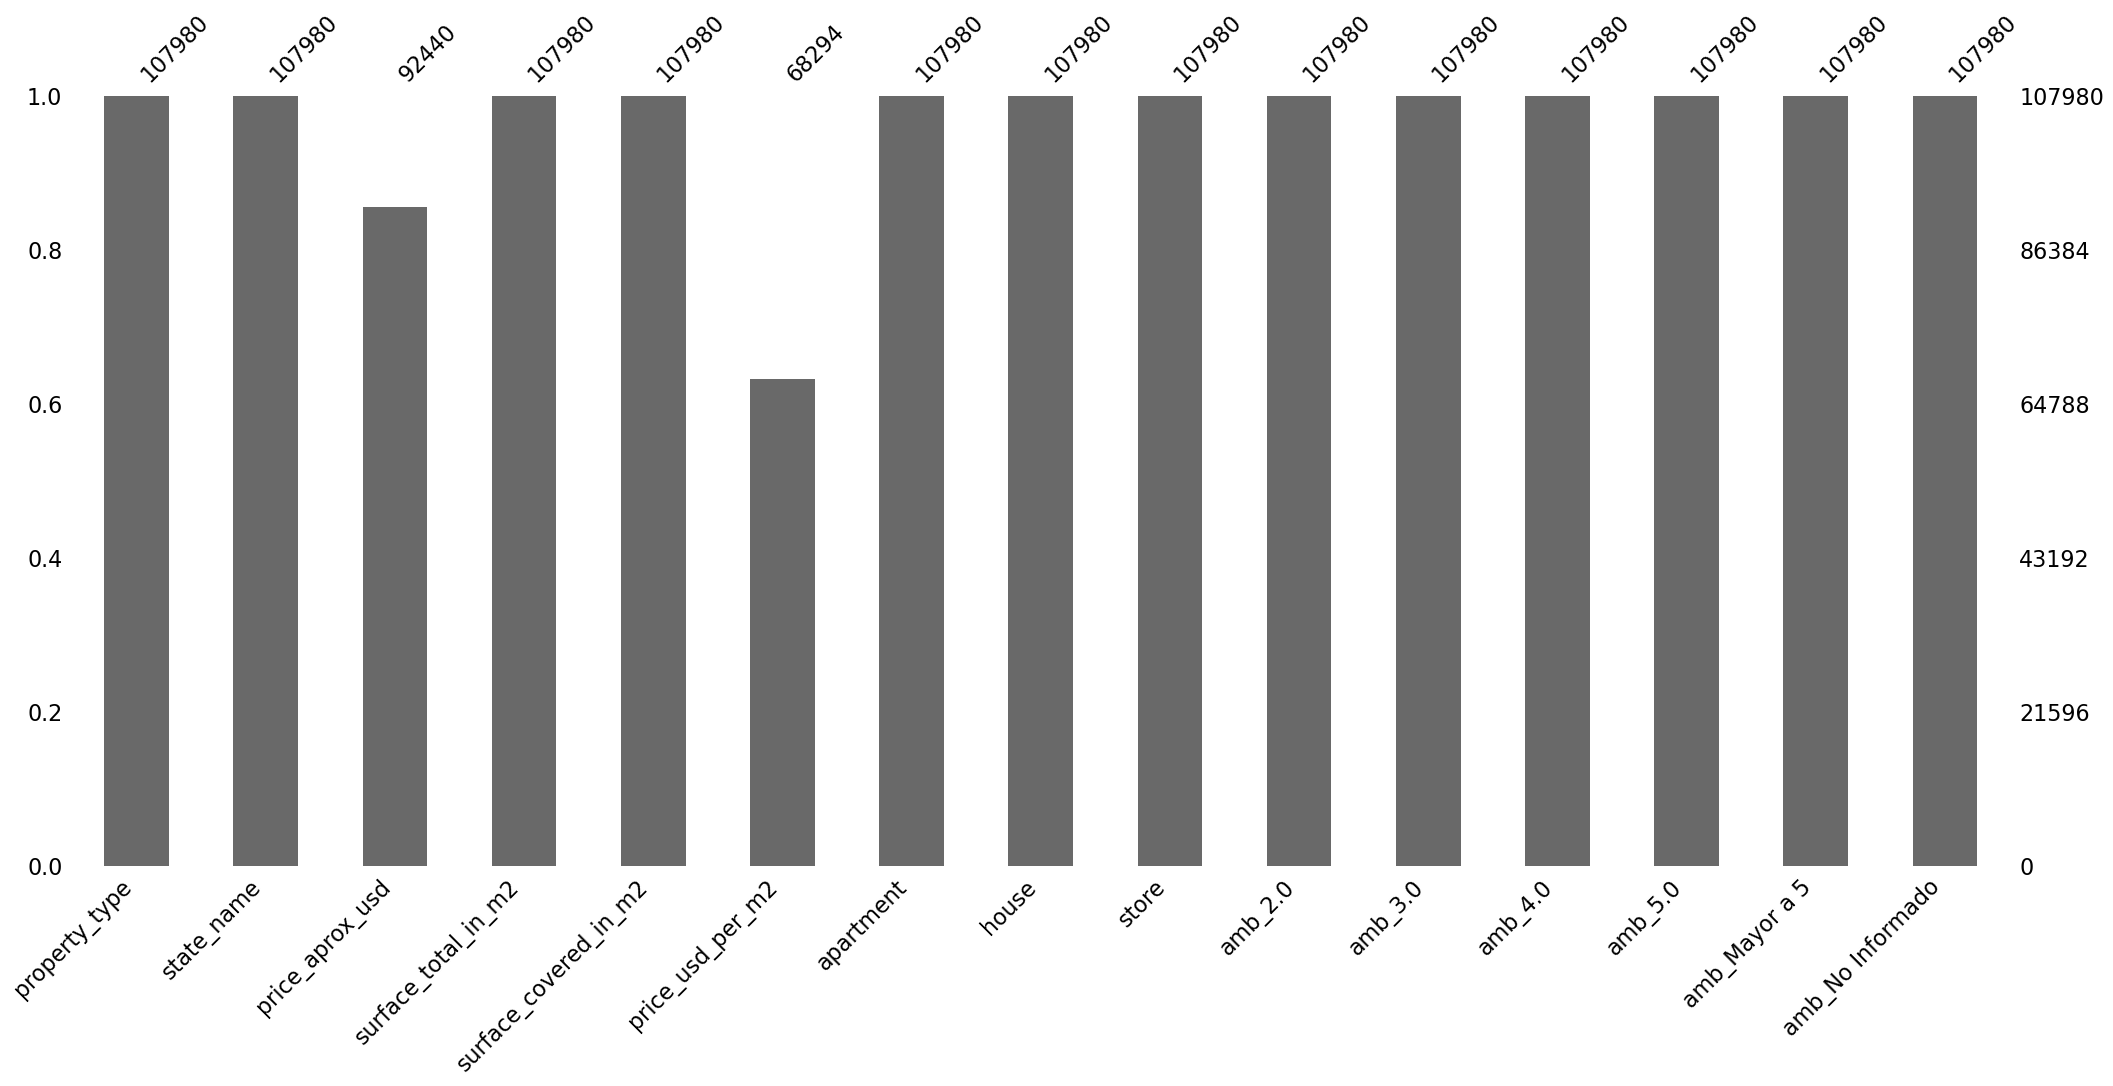

In [5]:
# Para saber valores no nulos

msno.bar(data)

MENCIONAR VARIABILIDAD DE LOS DATOS (HAY QUE COMPLETARLO)

Aproximadamente el 40% de las columnas contienen datos diferentes de NaN dentro de su estructura en el DataFrame. El restante 60% está distribuido de la siguiente manera: 
 - Columnas que contienen entre 50% y 80% de datos completos. (50%)
 - Columnas que contienen por debajo del 40% de datos completos. (10%)

TOMAR DECISIÓN RESPECTO A ¿CUÁL SERÁ NUESTRA VARIABLE TARGET? 

Según el análisis que hicimos para TP1 , propongo tomar como variable target la columna PRICE, QUE TENDRÍAMOS QUE RECUPERAR DEL DATAFRAME PRINCIPAL DE PROPERATTI O EN TAL CASO TOMAR LA COLUMNA PRICE_APROX_USD

## 4. Eliminación de datos.

Eliminar columna que tiene relación con precios y no son nuestra variable target, o ya fueron convertidas en variables dummies 

In [6]:
# data.drop(['price_usd_per_m2', 'property_type'], axis = 1, inplace = True)
data.drop(['price_usd_per_m2'], axis = 1, inplace = True)

Eliminar columnas donde existan valores nulos para la variable a predecir (price_aprox_usd)

In [7]:
data.dropna(axis = 0, subset = ['price_aprox_usd'], inplace = True)

<AxesSubplot: >

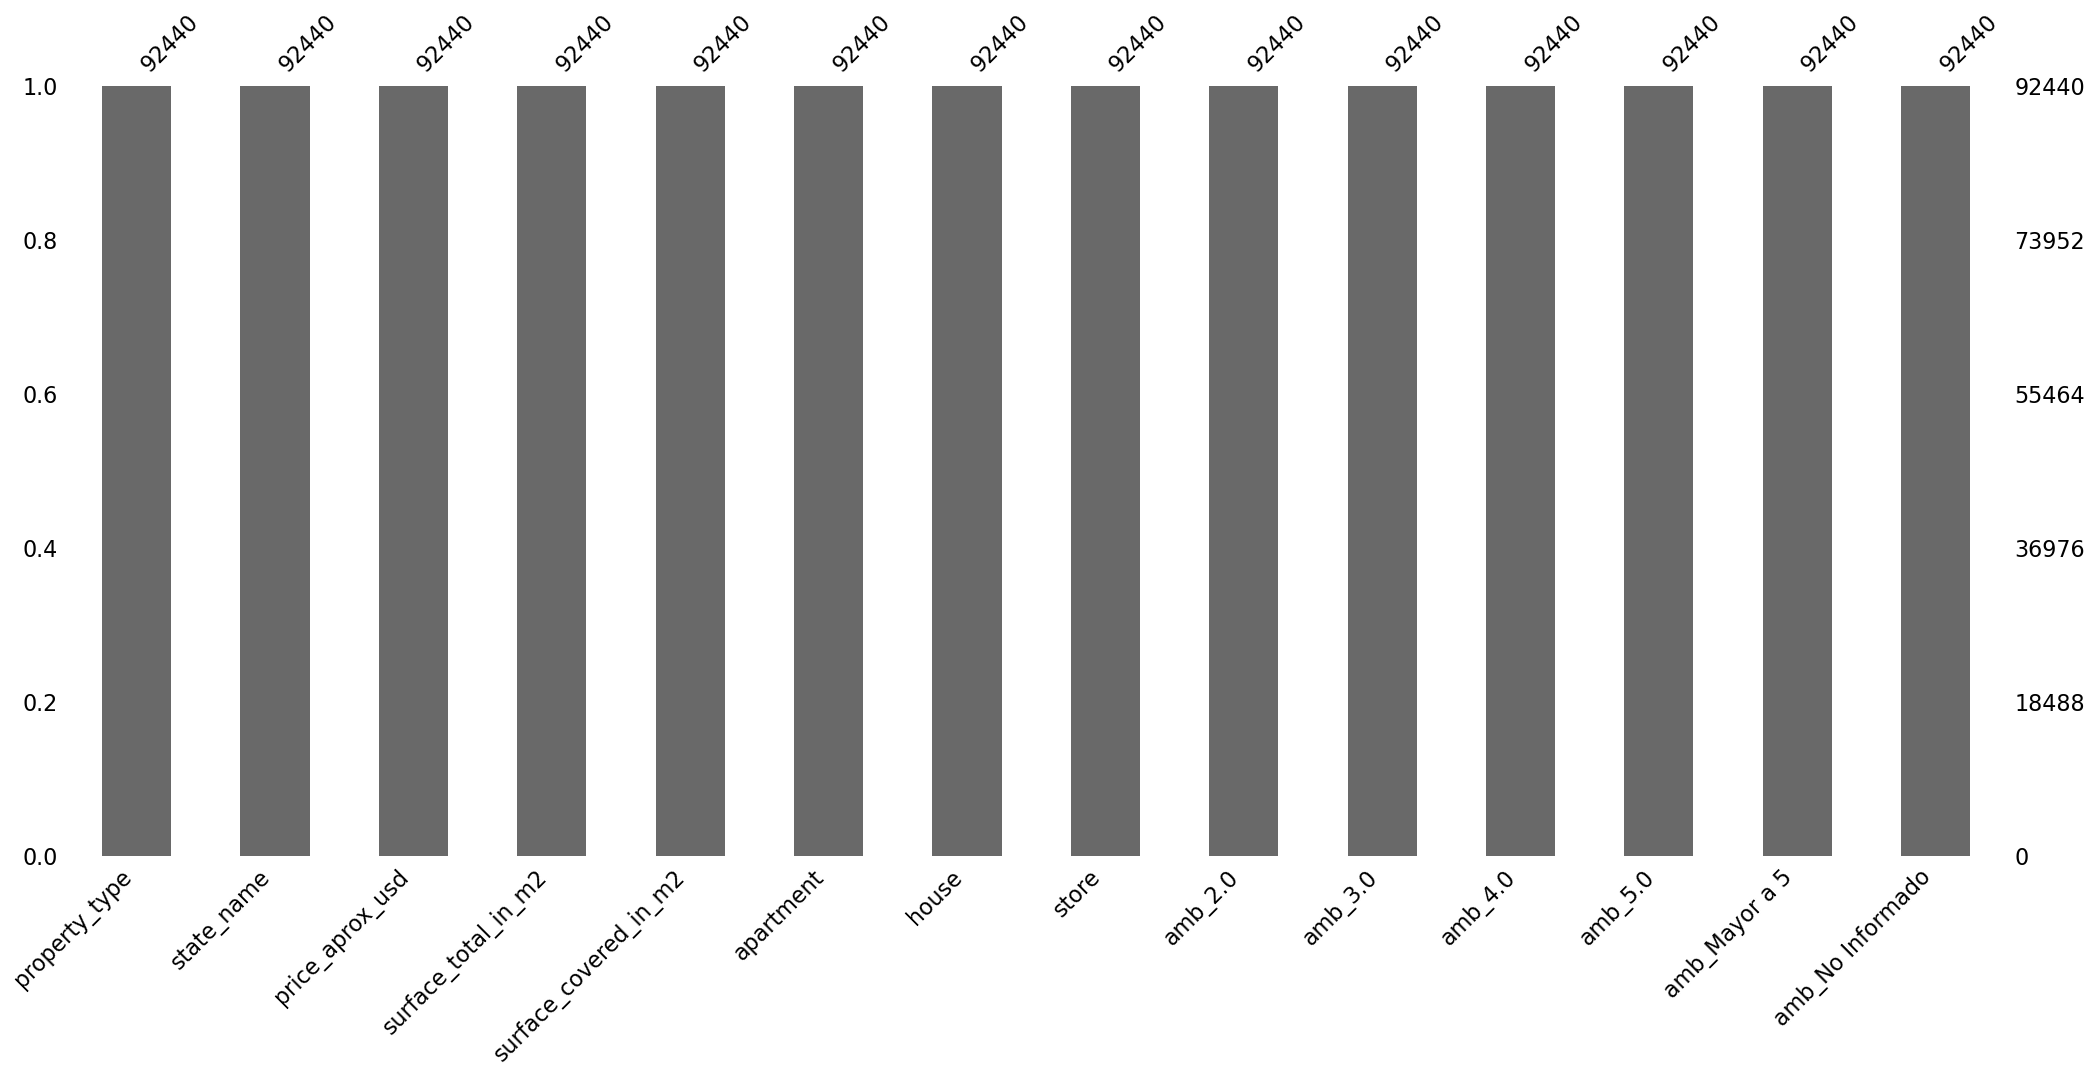

In [8]:
msno.bar(data)

In [9]:
data.sample(3)

,property_type,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,apartment,house,store,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_Mayor a 5,amb_No Informado
8508,apartment,Río Negro,145000.00,114.217780,65.0,1,0,0,0,1,0,0,0,0
34179,PH,Bs.As. G.B.A. Zona Oeste,80000.00,200.000000,45.0,0,0,0,0,1,0,0,0,0
98356,apartment,Córdoba,89677.79,93.131421,53.0,1,0,0,0,0,0,0,0,1


## 5. Creación de Variables Dummies.

Continuando con el análisis, la propuesta ahora es generar variables dummy para aquellas variables categóricas que podrían aportar información valiosa al momento de clasificar las propiedades.

Analizando el DataFrame , será creado un nuevo grupo de propiedades en el cual estarán agrupadas todas aquellas Provincias que posean un número de propiedades menor o igual a 100.

In [10]:
state_group = (data.groupby(['state_name'])['state_name'].count()).sort_values(ascending=False)
display(state_group)

state_name
Capital Federal                 28234
Bs.As. G.B.A. Zona Norte        23149
Bs.As. G.B.A. Zona Sur          10453
Buenos Aires Costa Atlántica     7997
Córdoba                          6857
Bs.As. G.B.A. Zona Oeste         6533
Santa Fe                         5055
Buenos Aires Interior            1543
Mendoza                           447
Corrientes                        441
Río Negro                         329
Neuquén                           300
Misiones                          262
Tucumán                           181
San Luis                          169
Chubut                            141
Entre Ríos                        100
Salta                              88
Chaco                              32
Formosa                            29
Tierra Del Fuego                   28
Catamarca                          22
La Pampa                           19
Santa Cruz                         12
Jujuy                              10
San Juan                            4
S

In [11]:
state_group = (data.groupby(['state_name'])['state_name'].count()).sort_values(ascending=False)

# Convertimos a DataFrame
state = pd.DataFrame(state_group)
state.index.name = None

# Generamos nuevo DataFrame con Provincias con 500 propiedades o menos 
pocas_propiedades = state[state['state_name'] <= 500]

pocas_prop = pocas_propiedades.index
pocas_prop

Index(['Mendoza', 'Corrientes', 'Río Negro', 'Neuquén', 'Misiones', 'Tucumán',
       'San Luis', 'Chubut', 'Entre Ríos', 'Salta', 'Chaco', 'Formosa',
       'Tierra Del Fuego', 'Catamarca', 'La Pampa', 'Santa Cruz', 'Jujuy',
       'San Juan', 'Santiago Del Estero', 'La Rioja'],
      dtype='object')

In [12]:
# Cambiamos el nombre de la Provincia por 'Pocas Propiedades' para aquellas Provincias encontradas en el paso anterior 
data['state_name'][data['state_name'].isin(pocas_prop)] = 'Otras Provincias'

C:\Users\mpire\AppData\Local\Temp\ipykernel_6928\879020014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_name'][data['state_name'].isin(pocas_prop)] = 'Otras Provincias'


In [13]:
# Generación de variables Dummies para state_name

state_name_dummies = pd.get_dummies(data['state_name'])
state_name_dummies

,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Buenos Aires Costa Atlántica,Buenos Aires Interior,Capital Federal,Córdoba,Otras Provincias,Santa Fe
0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
121215,0,0,0,0,0,1,0,0,0
121216,1,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,1,0,0,0
121218,0,0,0,1,0,0,0,0,0


In [14]:
# Para incorporar nuevas columnas dummies al DataFrame

propiedades = data.join([state_name_dummies])

In [15]:
# Eliminamos la columna Otras Provincias para evitar multicolinealidad en el DataFrame y la columna state_name
propiedades.drop(['Otras Provincias', 'state_name'], axis = 1, inplace=True)
propiedades

,property_type,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,apartment,house,store,amb_2.0,amb_3.0,amb_4.0,...,amb_Mayor a 5,amb_No Informado,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Buenos Aires Costa Atlántica,Buenos Aires Interior,Capital Federal,Córdoba,Santa Fe
0,PH,62000.0,55.0,40.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,apartment,72000.0,55.0,55.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,apartment,64000.0,35.0,35.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,PH,130000.0,106.0,78.0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7,apartment,138000.0,45.0,40.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,870000.0,113.0,93.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
121216,house,498000.0,360.0,360.0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
121217,apartment,131500.0,46.0,39.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
121218,apartment,95900.0,48.0,48.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

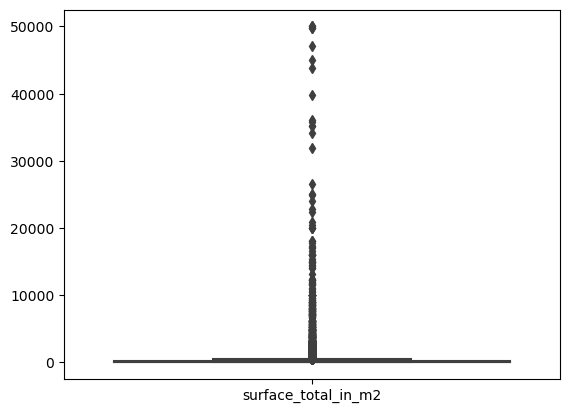

In [20]:
# Tener modelo OLS hechos   

sns.boxplot(data=propiedades[["price_aprox_usd"]], orient="v")

In [ ]:
sns.boxplot(data=propiedades[['surface_total_in_m2']], orient="v")

In [25]:
# Para garantizar que no existen valores nulos en el DataFrame
propiedades.isnull().sum()
propiedades.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

# MODELO OLS - MÍNIMO CUADRADOS

## 1. Considerando todos los tipos de propiedades 

Buscando diferentes aproximaciones a la solución que resuelva la relación entre precio de las propiedades y el grupo de features, en primer lugar consideramos todos los tipos de propiedades (house, apartment, PH, store).

Antes de ejecutar los números tenemos que definir una hipótesis nula y una hipótesis alternativa:

Hipótesis nula (H0): NO existe asociación entre el tipo de propiedad y el valor aproximado de la propiedad en USD(considerando los factores de confusión elegidos);

Hipótesis Alternativa (H1): Existe asociación entre el tipo de propiedad y el valor aproximado de la propiedad en USD.


In [38]:
# Para considerar las variables predictoras
feature_cols = [x for x in propiedades.columns if ((x != 'property_type') & (x != 'price_aprox_usd'))]

['surface_total_in_m2',
 'surface_covered_in_m2',
 'apartment',
 'house',
 'store',
 'amb_2.0',
 'amb_3.0',
 'amb_4.0',
 'amb_5.0',
 'amb_Mayor a 5',
 'amb_No Informado',
 'Bs.As. G.B.A. Zona Norte',
 'Bs.As. G.B.A. Zona Oeste',
 'Bs.As. G.B.A. Zona Sur',
 'Buenos Aires Costa Atlántica',
 'Buenos Aires Interior',
 'Capital Federal',
 'Córdoba',
 'Santa Fe']

In [39]:
# Para armar el modelo basados en OLS (Ordinary Least Squares) - Mínimos cuadrados
X = propiedades[feature_cols]
y = propiedades['price_aprox_usd']

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [40]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:03:27   Log-Likelihood:            -1.2920e+06
No. Observations:               92440   AIC:                         2.584e+06
Df Residuals:                   92420   BIC:                         2.584e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

A partir del análisis de la tabla resumen obtenido, se extrae lo siguiente: 
* El modelo logra explicar el 22% de la variabilidad de los resultados, según el R2 ajustado. 

* Considerando el Intervalo de Confianza (IC) del 95% obtenido para las features (excepto las variables discretas no binarias) surface_total_in_m2 con p-value > 0.05 incluye el 0 dentro de dicho intervalo, sugiriendo que la asociación no es estadísticamente significativa, por lo que no se puede rechazar la hipótesis nula de no asociación. Respecto a la variable surface_covered_in_m2 parecería ser la feature con mayor influencia con un alto valor de coeficiente respecto a surface_total_in_m2, p-valur menor a 0.05 e IC entre 339.823 y 355.256.

* Para las categorias discretas, en este caso transformadas a variables dummies, serán comparadas para modelos que consideren el tipo de propiedad. Además de lo anterior, será considerado que los coeficientes obtenidos serán compararados para el caso de tipo de propiedad con PH, y para el caso de numero de ambiente con numero de ambientes = 1, y para el caso de state_name(Provincia) serán comparadas con la categoría 'Otras Provincias'. 

## 2. Discriminando por tipo de propiedad

In [46]:
# Para tipo de propiedad "apartment"

apartment = propiedades.loc[propiedades['property_type'] == 'apartment']
apartment

feature_cols = [x for x in propiedades.columns if ((x != 'property_type') & (x != 'price_aprox_usd'))]
    
# Generando modelo OLS
X = propiedades[feature_cols]
y = propiedades['price_aprox_usd']

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:53:12   Log-Likelihood:            -1.2920e+06
No. Observations:               92440   AIC:                         2.584e+06
Df Residuals:                   92420   BIC:                         2.584e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
def tipo_propiedad(property_type):
    property_type = propiedades.loc[propiedades['property_type'] == property_type]
    feature_cols = [x for x in propiedades.columns if ((x != 'property_type') & (x != 'price_aprox_usd'))]
    
    # Generando modelo OLS
    X = property_type[feature_cols]
    y = property_type['price_aprox_usd']

    # Será agregada explícitamente una constante:
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    return model.summary()
    

In [49]:
tipo_propiedad('apartment')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     798.1
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:54:52   Log-Likelihood:            -7.5433e+05
No. Observations:               55071   AIC:                         1.509e+06
Df Residuals:                   55054   BIC:                         1.509e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
surface_total_in_m2            -53.6697      4.233    -12.680      0.000     -61.966     -45.374
surface_covered_in_m2          228.7489      8.806     25.976      0.000     211.489     246.009
apartment                     5.551e+04   7284.800      7.620      0.000    4.12e+04    6.98e+04
house                         2.202e-10   5.91e-12     37.288      0.000    2.09e-10    2.32e-10
store                        -4.062e-10   9.19e-12    -44.226      0.000   -4.24e-10   -3.88e-10
amb_2.0                       1.584e+04   3698.136      4.283      0.000    8589.751    2.31e+04
amb_3.0                         7.4e+04   3895.423     18.997      0.000    6.64e+04    8.16e+04
amb_4.0                       1.967e+05   4739.830     41.507      0.000    1.87e+05    2.06e+05
amb_5.0                       4.415e+05   7647.973     57.733      0.000    4.27e+05    4.57e+05
amb_Mayor a 5                 5.282e+05   1.02e+04     51.604      0.000    5.08e+05    5.48e+05
amb_No Informado              5.789e+04   3203.118     18.073      0.000    5.16e+04    6.42e+04
Bs.As. G.B.A. Zona Norte       7.31e+04   7009.918     10.428      0.000    5.94e+04    8.68e+04
Bs.As. G.B.A. Zona Oeste      -1.86e+04   7801.712     -2.384      0.017   -3.39e+04   -3311.214
Bs.As. G.B.A. Zona Sur        -975.6544   7411.774     -0.132      0.895   -1.55e+04    1.36e+04
Buenos Aires Costa Atlántica  5212.4708   7340.556      0.710      0.478   -9175.071    1.96e+04
Buenos Aires Interior        -5928.2481    1.1e+04     -0.541      0.588   -2.74e+04    1.55e+04
Capital Federal                9.67e+04   6808.382     14.203      0.000    8.34e+04     1.1e+05
Córdoba                      -1.367e+04   7521.774     -1.818      0.069   -2.84e+04    1071.559
Santa Fe                     -1.776e+04   7459.651     -2.381      0.017   -3.24e+04   -3142.595
==============================================================================
Omnibus:                    81879.570   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71446513.158
Skew:                           8.873   Prob(JB):                         0.00
Kurtosis:                     178.561   Cond. No.                     2.22e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
tipo_propiedad('house')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     320.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:54:21   Log-Likelihood:            -4.2119e+05
No. Observations:               29705   AIC:                         8.424e+05
Df Residuals:                   29688   BIC:                         8.426e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
surface_total_in_m2             11.2780      2.092      5.390      0.000       7.177      15.379
surface_covered_in_m2          300.1860      7.304     41.099      0.000     285.870     314.502
apartment                    -1.233e-10   2.68e-11     -4.599      0.000   -1.76e-10   -7.07e-11
house                         2.021e+05   3.09e+04      6.552      0.000    1.42e+05    2.63e+05
store                         6.061e-12   1.56e-11      0.388      0.698   -2.46e-11    3.67e-11
amb_2.0                       6.705e+04   3.39e+04      1.979      0.048     630.198    1.33e+05
amb_3.0                      -3.977e+04   3.05e+04     -1.302      0.193   -9.96e+04    2.01e+04
amb_4.0                      -4.634e+04   3.03e+04     -1.529      0.126   -1.06e+05     1.3e+04
amb_5.0                       1.059e+04   3.06e+04      0.346      0.729   -4.94e+04    7.05e+04
amb_Mayor a 5                 2.982e+04   3.07e+04      0.972      0.331   -3.03e+04       9e+04
amb_No Informado              1.679e+04   2.96e+04      0.567      0.571   -4.12e+04    7.48e+04
Bs.As. G.B.A. Zona Norte      1.399e+05   1.02e+04     13.693      0.000     1.2e+05     1.6e+05
Bs.As. G.B.A. Zona Oeste     -3.463e+04   1.17e+04     -2.952      0.003   -5.76e+04   -1.16e+04
Bs.As. G.B.A. Zona Sur        -1.25e+04   1.09e+04     -1.149      0.251   -3.38e+04    8829.735
Buenos Aires Costa Atlántica -3.088e+04   1.27e+04     -2.427      0.015   -5.58e+04   -5945.630
Buenos Aires Interior        -6.936e+04   1.54e+04     -4.492      0.000   -9.96e+04   -3.91e+04
Capital Federal               2.158e+05   1.27e+04     16.962      0.000    1.91e+05    2.41e+05
Córdoba                      -1.646e+04   1.19e+04     -1.387      0.166   -3.97e+04    6806.997
Santa Fe                     -7.458e+04   1.53e+04     -4.873      0.000   -1.05e+05   -4.46e+04
==============================================================================
Omnibus:                    44336.455   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         75422161.507
Skew:                           8.643   Prob(JB):                         0.00
Kurtosis:                     249.248   Cond. No.                     2.17e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
tipo_propiedad('store')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:56:44   Log-Likelihood:                -42192.
No. Observations:                2891   AIC:                         8.442e+04
Df Residuals:                    2874   BIC:                         8.452e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
surface_total_in_m2            274.3246     31.141      8.809      0.000     213.263     335.386
surface_covered_in_m2          173.9831     36.454      4.773      0.000     102.504     245.462
apartment                     2.513e-11    2.6e-10      0.097      0.923   -4.85e-10    5.36e-10
house                        -1.945e-11   6.33e-11     -0.308      0.758   -1.44e-10    1.05e-10
store                          1.73e+05   1.06e+05      1.626      0.104   -3.56e+04    3.82e+05
amb_2.0                      -7.951e+04   2.37e+05     -0.336      0.737   -5.44e+05    3.85e+05
amb_3.0                      -9.995e+04    2.1e+05     -0.475      0.635   -5.13e+05    3.13e+05
amb_4.0                       7133.0220   2.81e+05      0.025      0.980   -5.45e+05    5.59e+05
amb_5.0                       9.827e+04   5.39e+05      0.182      0.855   -9.59e+05    1.16e+06
amb_Mayor a 5                 2.153e+04   2.02e+05      0.107      0.915   -3.74e+05    4.17e+05
amb_No Informado              3.843e+04   9.59e+04      0.401      0.689    -1.5e+05    2.26e+05
Bs.As. G.B.A. Zona Norte      8.066e+04   5.18e+04      1.557      0.120   -2.09e+04    1.82e+05
Bs.As. G.B.A. Zona Oeste     -2.272e+04   6.15e+04     -0.369      0.712   -1.43e+05    9.79e+04
Bs.As. G.B.A. Zona Sur       -3.259e+04   5.23e+04     -0.623      0.533   -1.35e+05    6.99e+04
Buenos Aires Costa Atlántica  -8.84e+04   6.06e+04     -1.460      0.144   -2.07e+05    3.03e+04
Buenos Aires Interior        -8.164e+04   9.46e+04     -0.863      0.388   -2.67e+05    1.04e+05
Capital Federal               1.726e+05   4.88e+04      3.534      0.000    7.68e+04    2.68e+05
Córdoba                      -9.338e+04    5.9e+04     -1.583      0.114   -2.09e+05    2.23e+04
Santa Fe                     -8.213e+04   7.87e+04     -1.043      0.297   -2.36e+05    7.22e+04
==============================================================================
Omnibus:                     1174.586   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398543.625
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                      60.507   Cond. No.                     3.76e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.65e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""